In [1]:
import torch
from model import get_model, get_loss, get_optimizer  # Assuming model.py exists
from dataloader import get_dataloaders
import matplotlib.pyplot as plt

In [2]:
# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
# Get data loaders
train_loader, val_loader, test_loader = get_dataloaders(batch_size=32)

In [4]:
# Initialize model, loss function, and optimizer
model = get_model(device)
criterion = get_loss()
optimizer = get_optimizer(model, learning_rate=0.001)

In [5]:
num_epochs=5

In [7]:
train_losses = []
val_losses = []
val_accuracies = []

In [8]:
for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()

                preds = torch.sigmoid(outputs) > 0.5
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(correct / total)

        print(f"Epoch {epoch + 1}/{num_epochs}, "
              f"Training Loss: {train_losses[-1]}, "
              f"Validation Loss: {val_losses[-1]}, "
              f"Validation Accuracy: {val_accuracies[-1]:.2f}")



Epoch 1/5, Training Loss: 0.5858597275218159, Validation Loss: 0.7267767574320366, Validation Accuracy: 0.70
Epoch 2/5, Training Loss: 0.37513529249173694, Validation Loss: 0.4404411596251921, Validation Accuracy: 0.81
Epoch 3/5, Training Loss: 0.27048757411195984, Validation Loss: 0.6867816826934874, Validation Accuracy: 0.72
Epoch 4/5, Training Loss: 0.21149575838399498, Validation Loss: 0.4648480516687803, Validation Accuracy: 0.81
Epoch 5/5, Training Loss: 0.17718330685819875, Validation Loss: 0.46533971157550236, Validation Accuracy: 0.81


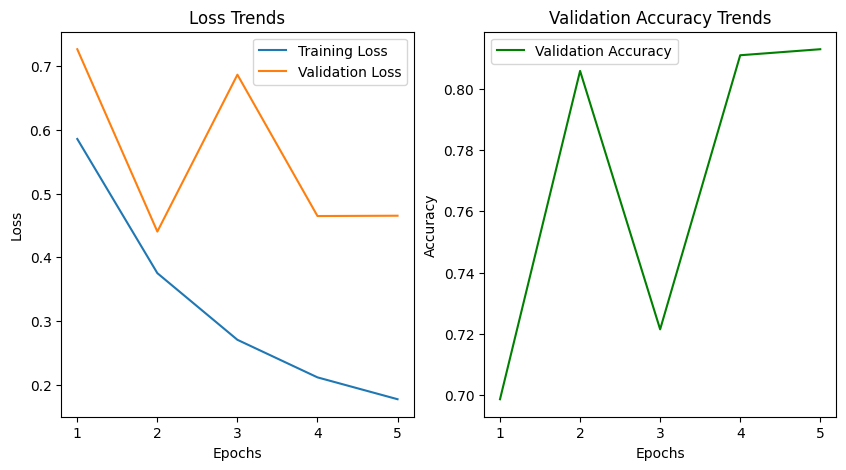

In [10]:
# Plot training and validation trends
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Trends')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy Trends')

plt.show()


In [11]:
#  NEW
# Save the model
torch.save(model.state_dict(), "deepfake_model_made_using_jupyternb.pth")
print("Model saved successfully.")

Model saved successfully.


# RAW CODE

# raw code end
--------------------------